<a href="https://colab.research.google.com/github/naldo14/tesis-/blob/main/BBN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## importo las librerias
import h5py
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow import keras
tfd = tfp.distributions
tfpl = tfp.layers

In [ ]:
## hago el mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Proceso de carga de los datos

In [ ]:
#creo el h5py de las features
path_features="/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/features_y"
hdf5_file_path = path_features
with h5py.File(hdf5_file_path, 'r') as hf:
    y_features = hf['features_y'][:]


In [ ]:

path_features="/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/y_targets"
hdf5_file_path = path_features
with h5py.File(hdf5_file_path, 'r') as hf:
    y_targets = hf['y_targets'][:]

In [ ]:
y_targets.shape

(55,)

In [ ]:
from sklearn.model_selection import train_test_split
# Assuming x is your dataset with shape (70, 14) and y is your labels
 x_train, x_test, y_train, y_test = train_test_split(y_features, y_targets, test_size=0.3, random_state=42)



### Creacion de la BNN

In [ ]:
## def prior weight distribution N(1,0) and not trainable
# Define the prior weight distribution N(0, 1)
def prior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    prior_model = keras.Sequential(
        [
            tfp.layers.DistributionLambda(
                lambda t: tfp.distributions.MultivariateNormalDiag(
                    loc=tf.zeros(n), scale_diag=tf.ones(n)
                )
            )
        ]
    )
    return prior_model

In [ ]:
# Define the posterior weight distribution Multivariate Gaussian distribution
def posterior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    posterior_model = keras.Sequential(
        [
            tfp.layers.VariableLayer(
                tfp.layers.MultivariateNormalTriL.params_size(n), dtype=dtype
            ),
            tfp.layers.MultivariateNormalTriL(n),
        ]
    )
    return posterior_model

In [ ]:
# Define the BNN model
model = tf.keras.Sequential([
    tfpl.DenseVariational(
        input_shape=(14,),
        units=50,
        make_prior_fn=prior,
        make_posterior_fn=posterior,
        activation='relu',
        kl_weight=1/x_train.shape[0],  # KL Weight
        # kl_use_exact=True
    ),

       tfpl.DenseVariational(
        units=40,
        make_prior_fn=prior,
        make_posterior_fn=posterior,
        activation='relu',
        use_bias=True,
        kl_weight=1/x_train.shape[0]  # KL Weight
    ),

    tfpl.DenseVariational(
        units=30,
        make_prior_fn=prior,
        make_posterior_fn=posterior,
        activation='relu',
        use_bias=True,
        kl_weight=1/x_train.shape[0]  # KL Weight
    ),

    tfpl.DenseVariational(
        units=25,
        make_prior_fn=prior,
        make_posterior_fn=posterior,
        activation='relu',
        use_bias=True,
        kl_weight=1/x_train.shape[0]  # KL Weight
    ),


      tfpl.DenseVariational(
        units=15,
        make_prior_fn=prior,
        make_posterior_fn=posterior,
        activation='relu',
        use_bias=True,
        kl_weight=1/x_train.shape[0]  # KL Weight
    ),
    tfpl.DenseVariational(
        units=10,
        make_prior_fn=prior,
        make_posterior_fn=posterior,
        activation='relu',
        use_bias=True,
        kl_weight=1/x_train.shape[0]  # KL Weight
    ),
    tfpl.DenseVariational(
        units=7,
        make_prior_fn=prior,
        make_posterior_fn=posterior,
        activation='relu',
        use_bias=True,
        kl_weight=1/x_train.shape[0]  # KL Weight
    ),
    tfpl.DenseVariational(
        units=1,
        make_prior_fn=prior,
        make_posterior_fn=posterior,
        activation='linear',
        use_bias=True,
        kl_weight=1/x_train.shape[0]  # KL Weight
    ),
])

In [ ]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7f5fc4208ee0>>

Epoch 1/600
2/2 - 10s - loss: 30.3930 - accuracy: 0.6579 - false_negatives_5: 1.0000 - false_positives_5: 12.0000 - 10s/epoch - 5s/step
Epoch 2/600
2/2 - 0s - loss: 33.9291 - accuracy: 0.3684 - false_negatives_5: 23.0000 - false_positives_5: 1.0000 - 336ms/epoch - 168ms/step
Epoch 3/600
2/2 - 0s - loss: 33.2548 - accuracy: 0.5526 - false_negatives_5: 4.0000 - false_positives_5: 13.0000 - 330ms/epoch - 165ms/step
Epoch 4/600
2/2 - 0s - loss: 38.3715 - accuracy: 0.3947 - false_negatives_5: 23.0000 - false_positives_5: 0.0000e+00 - 353ms/epoch - 176ms/step
Epoch 5/600
2/2 - 0s - loss: 31.3887 - accuracy: 0.3947 - false_negatives_5: 20.0000 - false_positives_5: 3.0000 - 332ms/epoch - 166ms/step
Epoch 6/600
2/2 - 0s - loss: 32.2619 - accuracy: 0.5526 - false_negatives_5: 4.0000 - false_positives_5: 13.0000 - 318ms/epoch - 159ms/step
Epoch 7/600
2/2 - 0s - loss: 30.0335 - accuracy: 0.6053 - false_negatives_5: 0.0000e+00 - false_positives_5: 15.0000 - 346ms/epoch - 173ms/step
Epoch 8/600
2/2 

1/1 [==============================] - 3s 3s/step - loss: 34.8756 - accuracy: 0.5882 - false_negatives_5: 0.0000e+00 - false_positives_5: 7.0000
Test Loss: 34.8756
Test Accuracy: 58.82%
False Negatives: 0
False Positives: 7
1/1 [==============================] - 2s 2s/step
Confusion Matrix:
[[ 0  7]
 [ 0 10]]
1/1 [==============================] - 0s 41ms/step


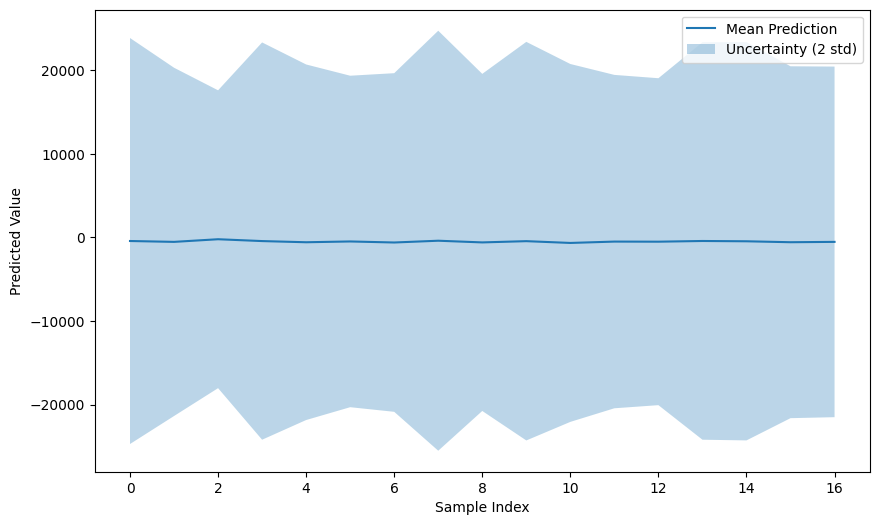

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])

# Train the model
history = model.fit(x_train, y_train, epochs=600, verbose=2)

# Evaluate the model on the test data
test_loss, test_accuracy, false_negatives, false_positives = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"False Negatives: {false_negatives:.0f}")
print(f"False Positives: {false_positives:.0f}")

# Make predictions on test data
y_pred = model.predict(x_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(confusion)

# Visualize uncertainty by sampling from the posterior distribution
n_samples = 100  # Number of samples to draw
predictions = []
for _ in range(n_samples):
    y_pred_sample = model.predict(x_test)
    predictions.append(y_pred_sample)

# Calculate mean and standard deviation of predictions
predictions = np.array(predictions)
mean_prediction = predictions.mean(axis=0)
std_prediction = predictions.std(axis=0)

mean_prediction = mean_prediction.ravel()
std_prediction = std_prediction.ravel()

# Plot mean prediction and uncertainty
plt.figure(figsize=(10, 6))
plt.plot(mean_prediction, label='Mean Prediction')
plt.fill_between(
    range(len(mean_prediction)),
    mean_prediction - 2 * std_prediction,
    mean_prediction + 2 * std_prediction,
    alpha=0.3,
    label='Uncertainty (2 std)'
)
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.legend()

In [ ]:
del model

NameError: ignored

In [ ]:
test_accuracy


0.5882353186607361

In [ ]:
test_accuracy

0.5882353186607361